# An analysis of the Boston Airbnb Dataset
In this Dataset, I attempt to visualise and predict pricing for Airbnb Properties in Boston

In [53]:
#importing required libraries and setting 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, f_regression
pd.set_option('display.max_columns',None)

## Business Questions:
1. How do prices vary across the different regions in Boston?
2. How does pricing scale across different types of properties in Boston?
3. What are the most and least common amenities in Boston?
4. Can we create a simple model to attempt to predict prices in Boston, using simply neighbourhood and property data?

In [3]:
boston_listings=pd.read_csv(os.path.join("Boston","listings.csv")) #loading the main dataset

## Data Understanding, issues and initial steps:
1. Taking a peek at the dataset
2. Checking what are the potential issues with the dataset (NaN values, data types etc)
3. Cleaning up any issues with the data 

In [4]:
boston_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United Sta

In [99]:
#Getting the shape of the dataset
boston_listings.shape

(3585, 76)

In [5]:
#checking percentage of NaN's in each column in the dataset
boston_listings[boston_listings.columns[boston_listings.isnull().any()]].isnull().sum() * 100 / boston_listings.shape[0]

summary                           3.988842
space                            29.483961
neighborhood_overview            39.470014
notes                            55.090656
transit                          35.983264
access                           41.534170
interaction                      43.347280
house_rules                      33.249651
thumbnail_url                    16.708508
medium_url                       16.708508
xl_picture_url                   16.708508
host_location                     0.306834
host_about                       36.513250
host_response_time               13.138075
host_response_rate               13.138075
host_acceptance_rate             13.138075
host_neighbourhood                9.456067
neighbourhood                    15.146444
neighbourhood_group_cleansed    100.000000
city                              0.055788
zipcode                           1.059972
market                            0.390516
property_type                     0.083682
bathrooms  

In [6]:
#deleting the columns with 100% NaN's
boston_nunique=boston_listings.nunique(dropna=False)
boston_del=boston_nunique[boston_nunique==1].index
boston_listings=boston_listings.drop(boston_del,axis=1)

In [7]:
#dropping all columns that are just urls
boston_listings.drop(boston_listings.filter(regex='url').columns, axis=1, inplace=True)

In [8]:
#drop all columns that are descriptive as we are not doing text mining., drop identifying information as well except for ID
boston_listings_clean=boston_listings.drop(columns=['name','summary','space','description','neighborhood_overview','notes','transit','access','interaction','host_id','host_about','street'],inplace=False)

In [9]:
boston_listings_clean.head()


,id,house_rules,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,Clean up and treat the home the way you'd like...,Virginia,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,Pet friendly but please confirm with me if the...,Andrea,2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,moderate,f,f,1,1.30
2,6976,"I encourage you to use my kitchen, cooking and...",Phil,2009-05-11,"Boston, Massachusetts, United States",within a few hours,100%,88%,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,$65.00,$395.00,"$1,350.00",NaN,NaN,1,$20.00,3,45,5 days ago,19,46,61,319,41,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,moderate,t,f,1,0.47
3,1436513,- The bathroom and house are shared so please ...,Meghna,2013-04-21,"Boston, Massachusetts, United States",within a few hours,100%,50%,f,NaN,1,1,"['email', 'phone', 'reviews']",t,f,NaN,Roslindale,Boston,NaN,Boston,"Boston, MA",42.281106,-71.121021,f,House,Private room,4,1.0,1.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$75.00,NaN,NaN,$100.00,$50.00,2,$25.00,1,1125,a week ago,6,16,26,98,1,2016-08-28,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.00
4,7651065,"Please no smoking in the house, porch or on th...",Linda,2014-05-11,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.284512,-71.136258,t,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$79.00,NaN,NaN,NaN,$15.00,1,$0.00,2,31,2 weeks ago,13,34,59,334,29,2015-08-18,2016-09-01,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,flexible,f,f,1,2.25


In [10]:
boston_listings_clean['amenities']

0       {TV,"Wireless Internet",Kitchen,"Free Parking ...
1       {TV,Internet,"Wireless Internet","Air Conditio...
2       {TV,"Cable TV","Wireless Internet","Air Condit...
3       {TV,Internet,"Wireless Internet","Air Conditio...
4       {Internet,"Wireless Internet","Air Conditionin...
                              ...                        
3580    {Internet,"Wireless Internet","Air Conditionin...
3581    {TV,Internet,"Wireless Internet","Air Conditio...
3582    {"translation missing: en.hosting_amenity_49",...
3583    {Kitchen,Gym,"Family/Kid Friendly",Washer,Drye...
3584    {"Wireless Internet",Kitchen,Essentials,"trans...
Name: amenities, Length: 3585, dtype: object

We see that the list of amenities is a string object even thought it is supposed to be a collection, the following cell has code to re evaluate the column as a column of lists

In [11]:
boston_listings_clean['amenities']=boston_listings_clean['amenities'].str.replace('{','[')
boston_listings_clean['amenities']=boston_listings_clean['amenities'].str.replace('}',']')
toclean_amenities=list(boston_listings_clean['amenities'])
cleaned_amenities=[]
for item in toclean_amenities:
    cleaned_res=item.strip('][').split(',')
    for element in cleaned_res:
        cleaned_amenities.append(cleaned_res)
boston_listings_clean=boston_listings_clean.join(pd.DataFrame({'amenities_cleaned':cleaned_amenities}))

In [12]:
boston_listings_clean.head()

,id,house_rules,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,city,zipcode,market,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,amenities_cleaned
0,12147973,Clean up and treat the home the way you'd like...,Virginia,2015-04-15,"Boston, Massachusetts, United States",NaN,NaN,NaN,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"[TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,moderate,f,f,1,NaN,"[TV, ""Wireless Internet"", Kitchen, ""Free Parki..."
1,3075044,Pet friendly but please confirm with me if the...,Andrea,2012-06-07,"Boston, Massachusetts, United States",within an hour,100%,100%,f,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"[TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,26,54,84,359,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,t,moderate,f,f,1,1.30,"[TV, ""Wireless Internet"", Kitchen, ""Free Parki..."
2,6976,"I encourage you to use my kitchen, cooking and...",Phil,2009-05-11,"Boston, Massachusetts, United States",within a few hours,100%,88%,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'jumio']",t,t,Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"[TV,""Cable TV"",""Wireless Internet"",""Air Condit...",NaN,$65.00,$395.00,"$1,350.00",NaN,NaN,1,$20.00,3,45,5 days ago,19,46,61,319,41,2009-07-19,2016-08-05,98.0,10.0,9.0,10.0,10.0,9.0,10.0,f,moderate,t,f,1,0.47,"[TV, ""Wireless Internet"", Kitchen, ""Free Parki..."
3,1436513,- The bathroom and house are shared so please ...,Meghna,2013-04-21,"Boston, Massachusetts, United States",within a few hours,100%,50%,f,NaN,1,1,"['email', 'phone', 'reviews']",t,f,NaN,Roslindale,Boston,NaN,Boston,"Boston, MA",42.281106,-71.121021,f,House,Private room,4,1.0,1.0,2.0,Real Bed,"[TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$75.00,NaN,NaN,$100.00,$50.00,2,$25.00,1,1125,a week ago,6,16,26,98,1,2016-08-28,2016-08-28,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.00,"[TV, ""Wireless Internet"", Kitchen, ""Free Parki..."
4,7651065,"Please no smoking in the house, porch or on th...",Linda,2014-05-11,"Boston, Massachusetts, United States",within an hour,100%,100%,t,Roslindale,1,1,"['email', 'phone', 'reviews', 'kba']",t,t,Roslindale,Roslindale,Boston,02131,Boston,"Boston, MA",42.284512,-71.136258,t,House,Private room,2,1.5,1.0,2.0,Real Bed,"[Internet,""Wireless Internet"",""Air Conditionin...",NaN,$79.00,NaN,NaN,NaN,$15.00,1,$0.00,2,31,2 weeks ago,13,34,59,334,29,2015-08-18,2016-09-01,99.0,10.0,10.0,10.0,10.0,9.0,10.0,f,flexible,f,f,1,2.25,"[TV, ""Wireless Internet"", Kitchen, ""Free Parki..."


In [20]:
#Cleaning the pricing variable
boston_listings_clean['price_clean'] = boston_listings.price.str.replace("\$|,",'').astype(float)

## What is the pricing distribution of Hotels in Boston?

In [22]:
#get basic price statistics
boston_listings_clean['price_clean'].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price_clean, dtype: float64

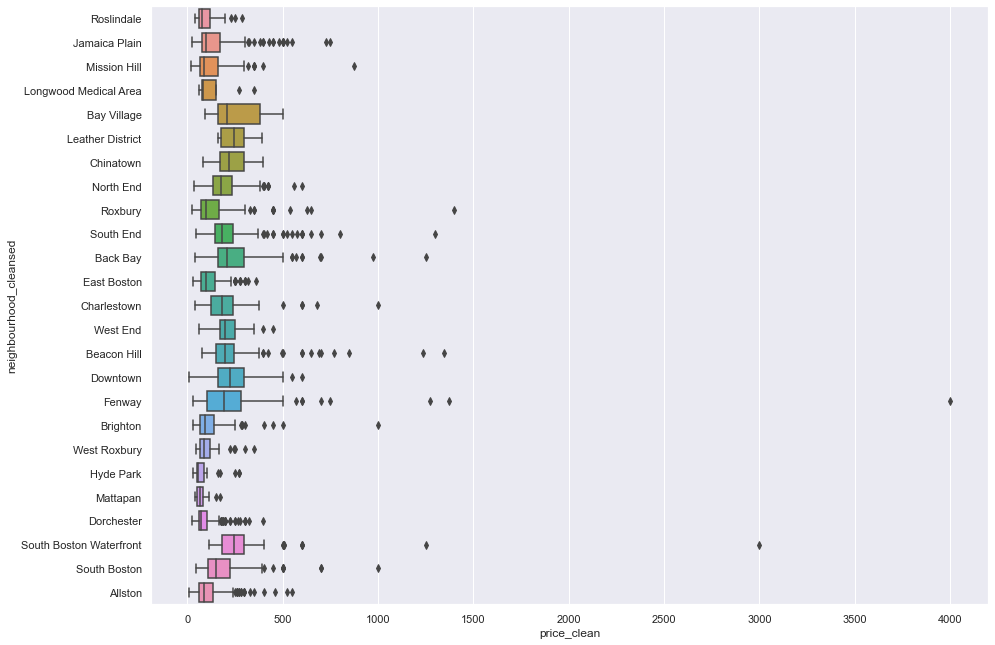

In [23]:
#plotting the boxplot of neighbourhoods
sns.set(rc={'figure.figsize':(15,11)})
price_neighbourhood_plot=sns.boxplot(x="price_clean",y="neighbourhood_cleansed",data=boston_listings_clean)

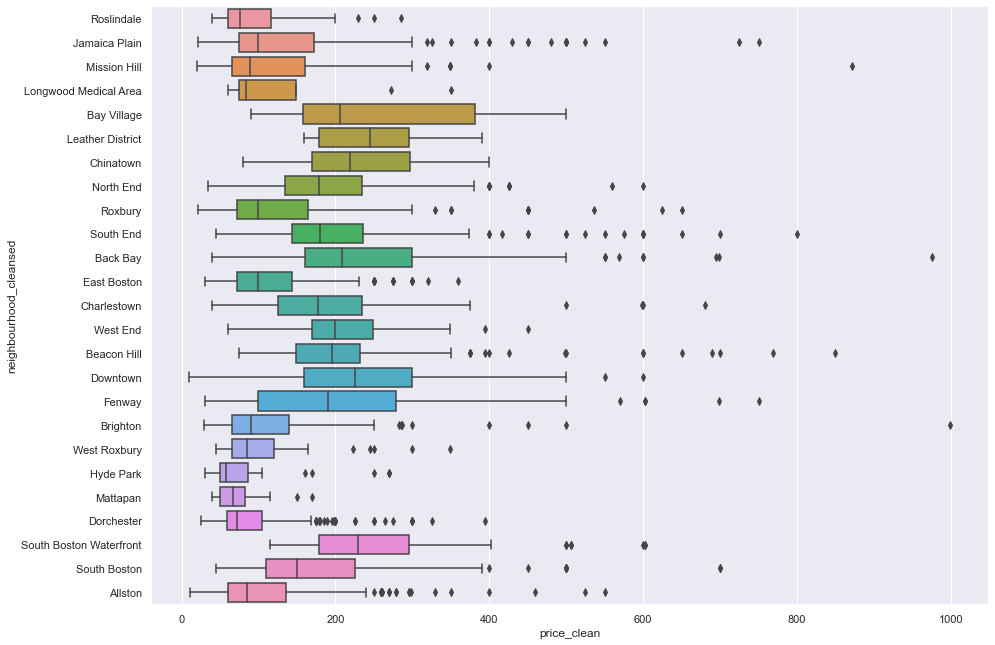

In [25]:
#plotting the boxplot of neighbourhoods but limiting to properties below $1000
sns.set(rc={'figure.figsize':(15,11)})
price_neighbourhood_plot=sns.boxplot(x="price_clean",y="neighbourhood_cleansed",data=boston_listings_clean[boston_listings_clean['price_clean']<1000])

From the neighbourhood analysis the following is clear:
1. We can find properties at almost any price range in Boston, however since the 25-75% window is 85-220$ and the mean is 174 we can assume that most properties lie in that region
2. Downtown seems to have the absolute cheapest properties, but Roslindale, Allston and Hyde Park are the cheapest neighbourhoods to rent from
3. Bay Village is the most premium region (ignoring the odd outlier in Fenway)
4. Most areas have a wide price range ranging from sub-100 to 250+ ranges

## A quick look at the most common amenities in Boston Hotels

In [28]:
#creating a one hot encoding of all the amenities
lb=MultiLabelBinarizer()
lb.fit(list(boston_listings_clean['amenities_cleaned']))
boston_amenities=pd.DataFrame(lb.fit_transform(list(boston_listings_clean['amenities_cleaned'])),columns=lb.classes_)

In [29]:
#since we have one hot encoded the values we can find the % properties having a certain amenity by calculating the means
boston_amenities.mean().sort_values(ascending=False)

"Wireless Internet"                             0.982148
Heating                                         0.967922
"Smoke Detector"                                0.903487
Kitchen                                         0.880335
Essentials                                      0.877545
"Carbon Monoxide Detector"                      0.812552
Washer                                          0.756485
Dryer                                           0.754254
Internet                                        0.731381
Shampoo                                         0.699024
"Air Conditioning"                              0.696513
"Fire Extinguisher"                             0.668619
TV                                              0.650488
"Free Parking on Premises"                      0.610600
"Family/Kid Friendly"                           0.579358
Hangers                                         0.577406
"Hair Dryer"                                    0.556206
"First Aid Kit"                

In [30]:
boston_amenities_top=boston_amenities.mean().sort_values(ascending=False)[:15]

In [31]:
boston_amenities_top

"Wireless Internet"           0.982148
Heating                       0.967922
"Smoke Detector"              0.903487
Kitchen                       0.880335
Essentials                    0.877545
"Carbon Monoxide Detector"    0.812552
Washer                        0.756485
Dryer                         0.754254
Internet                      0.731381
Shampoo                       0.699024
"Air Conditioning"            0.696513
"Fire Extinguisher"           0.668619
TV                            0.650488
"Free Parking on Premises"    0.610600
"Family/Kid Friendly"         0.579358
dtype: float64

We can see from the the amenities that internet, heating, smoke dectector and kitchens are some of the most important factors in Airbnb's in Boston.
Unfourtunately, Wheelchair Accessibility and elevators are not commonly found, therefore one must have to look specifically for these features if they want them.

## Analysing the various types of properties and rooms available in Boston

<AxesSubplot:xlabel='room_type', ylabel='price_clean'>

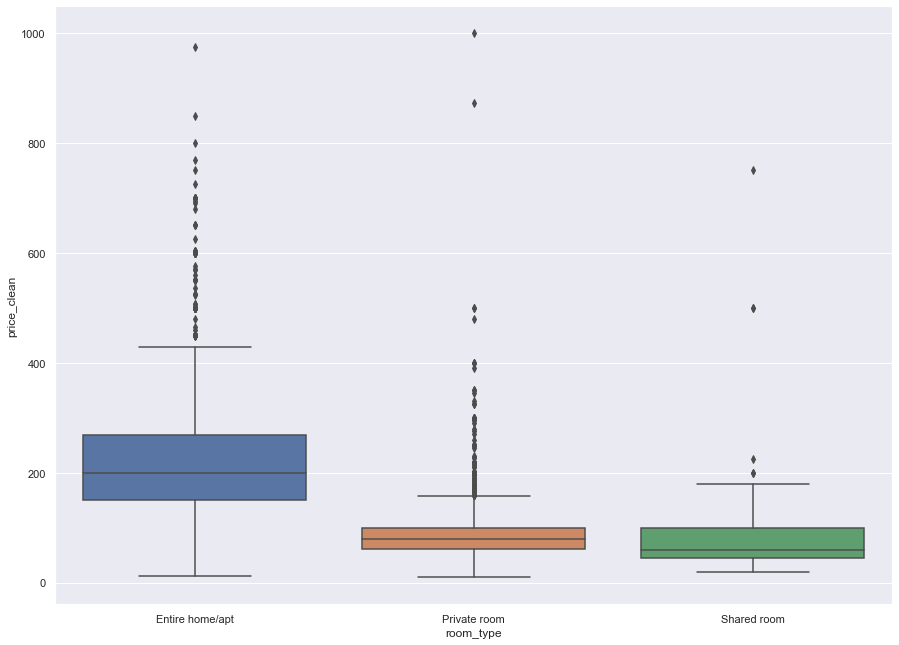

In [33]:
sns.boxplot(x="room_type", y="price_clean", data=boston_listings_clean[boston_listings_clean['price_clean']<1000])

<AxesSubplot:xlabel='property_type', ylabel='price_clean'>

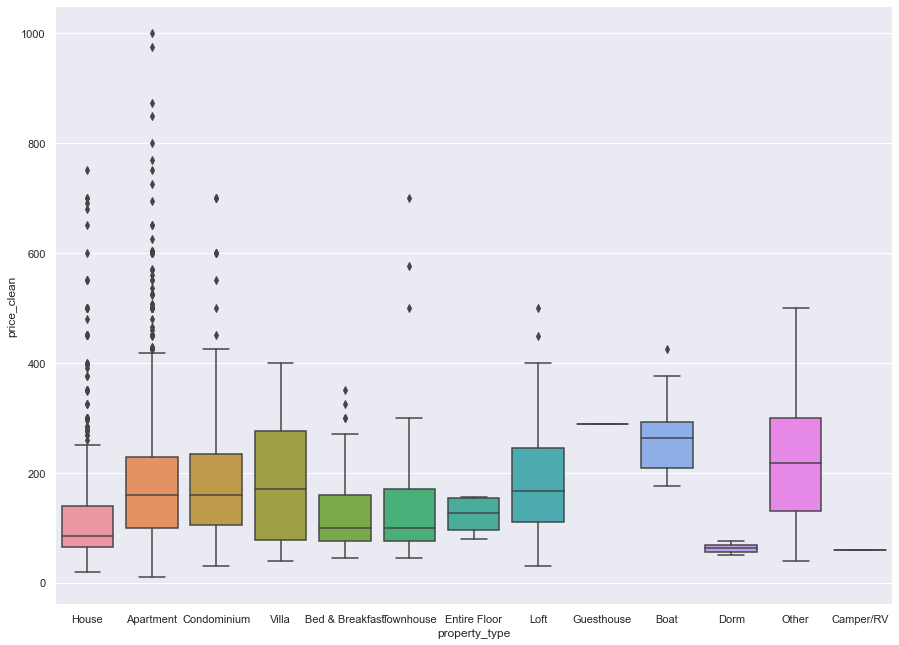

In [34]:
sns.boxplot(x="property_type", y="price_clean", data=boston_listings_clean[boston_listings_clean['price_clean']<1000])

In [36]:
boston_listings_clean.groupby(['room_type'])['price_clean'].describe()

,count,mean,std,min,25%,50%,75%,max
room_type,,,,,,,,
Entire home/apt,2127.0,227.436765,157.852765,11.0,150.0,199.0,269.0,4000.0
Private room,1378.0,96.041364,85.093706,10.0,62.0,80.0,100.0,1400.0
Shared room,80.0,92.762500,108.733822,20.0,45.0,60.0,99.0,750.0


In [37]:
boston_listings_clean.groupby(['property_type'])['price_clean'].describe()

,count,mean,std,min,25%,50%,75%,max
property_type,,,,,,,,
Apartment,2612.0,181.966692,154.323177,10.0,99.00,159.0,229.00,4000.0
Bed & Breakfast,41.0,129.365854,79.087216,44.0,75.00,100.0,160.00,350.0
Boat,12.0,268.833333,77.754665,175.0,209.00,262.5,292.50,425.0
Camper/RV,1.0,60.000000,NaN,60.0,60.00,60.0,60.00,60.0
Condominium,231.0,190.246753,122.218815,30.0,104.00,160.0,234.50,700.0
Dorm,2.0,62.500000,17.677670,50.0,56.25,62.5,68.75,75.0
Entire Floor,4.0,122.000000,37.850583,80.0,95.00,126.5,153.50,155.0
Guesthouse,1.0,289.000000,NaN,289.0,289.00,289.0,289.00,289.0
House,562.0,131.599644,131.121033,20.0,65.00,84.5,140.00,1300.0


From the data we can see that:
1. a majority of Rooms in Boston are either Entire Houses or private rooms, with private rooms being significantly cheaper than houses. The shared rooms are not much cheaper than private rooms and are also very limited in number.
2. Apartments and houses are the most common types of properties, with houses, condomiuniums (apartment complexes) being much fewer and further behind
3. Bed & Breakfasts, while few in number seem to be a fairly viable option for cheap stays, with prices at the 25%,50% and 75% level being significantly cheaper than apartments.
4. Interestingly townhouses are cheaper than apartments as well. However, the number of these are also few.

# Creating a Simple Regression Model to predict pricing

## Steps taken:
1. Select the room, property, neighbourhood columns.
2. Drop all rows with NaN's as they are few in number.
3. One hot encode the independent variables.
4. Split into an 90-10 training and test dataset.
5. Run a Linear Regression on the dataset.
6. Attempt to improve the model by selecting variables with the top correlations. 

In [109]:
#taking the necessary columns
dataset=boston_listings_clean[['property_type','room_type','neighbourhood_cleansed','price_clean']]

In [110]:
dataset.head()

,property_type,room_type,neighbourhood_cleansed,price_clean
0,House,Entire home/apt,Roslindale,250.0
1,Apartment,Private room,Roslindale,65.0
2,Apartment,Private room,Roslindale,65.0
3,House,Private room,Roslindale,75.0
4,House,Private room,Roslindale,79.0


In [111]:
dataset.dropna()

,property_type,room_type,neighbourhood_cleansed,price_clean
0,House,Entire home/apt,Roslindale,250.0
1,Apartment,Private room,Roslindale,65.0
2,Apartment,Private room,Roslindale,65.0
3,House,Private room,Roslindale,75.0
4,House,Private room,Roslindale,79.0
...,...,...,...,...
3580,Apartment,Private room,Charlestown,69.0
3581,Apartment,Private room,Allston,150.0
3582,Apartment,Entire home/apt,Charlestown,198.0
3583,Apartment,Private room,Charlestown,65.0


In [112]:
#one hot encoding the columns
dataset_one_hot=pd.get_dummies(dataset,columns=['property_type','room_type','neighbourhood_cleansed'])

In [113]:
#calculating the correlations between the various columns
dataset_one_hot.corr()

,price_clean,property_type_Apartment,property_type_Bed & Breakfast,property_type_Boat,property_type_Camper/RV,property_type_Condominium,property_type_Dorm,property_type_Entire Floor,property_type_Guesthouse,property_type_House,property_type_Loft,property_type_Other,property_type_Townhouse,property_type_Villa,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Bay Village,neighbourhood_cleansed_Beacon Hill,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Charlestown,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_East Boston,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_Hyde Park,neighbourhood_cleansed_Jamaica Plain,neighbourhood_cleansed_Leather District,neighbourhood_cleansed_Longwood Medical Area,neighbourhood_cleansed_Mattapan,neighbourhood_cleansed_Mission Hill,neighbourhood_cleansed_North End,neighbourhood_cleansed_Roslindale,neighbourhood_cleansed_Roxbury,neighbourhood_cleansed_South Boston,neighbourhood_cleansed_South Boston Waterfront,neighbourhood_cleansed_South End,neighbourhood_cleansed_West End,neighbourhood_cleansed_West Roxbury
price_clean,1.000000,0.088830,-0.032316,0.037085,-0.012831,0.028880,-0.017750,-0.011701,0.012960,-0.123051,0.008121,0.026070,-0.020753,0.004300,0.435788,-0.414956,-0.082678,-0.116179,0.137066,0.051428,0.081472,-0.086753,0.029070,0.055997,-0.158025,0.094653,-0.077174,0.092949,-0.055024,-0.077742,0.020077,-0.012002,-0.054690,-0.066312,0.029895,-0.064125,-0.038059,0.020838,0.137159,0.064880,0.028309,-0.051363
property_type_Apartment,0.088830,1.000000,-0.176228,-0.094952,-0.027368,-0.429986,-0.038710,-0.054759,-0.027368,-0.706446,-0.171828,-0.113095,-0.202618,-0.067085,0.273639,-0.281109,0.015767,-0.030072,0.115102,-0.034509,0.090533,-0.039099,-0.053863,0.064245,-0.083314,0.060703,-0.004037,0.148861,-0.105597,-0.123487,-0.027615,-0.006986,-0.096047,0.015978,0.053886,-0.120399,-0.031682,-0.104426,0.056422,0.062133,0.061043,-0.103194
property_type_Bed & Breakfast,-0.032316,-0.176228,1.000000,-0.006233,-0.001797,-0.028227,-0.002541,-0.003595,-0.001797,-0.046376,-0.011280,-0.007424,-0.013301,-0.004404,-0.119231,0.119941,0.001511,-0.030077,-0.032622,0.055511,0.009060,-0.001373,0.026209,-0.015289,0.009197,0.000404,-0.022476,-0.003046,0.018289,0.054201,-0.004020,-0.005396,0.055511,-0.020359,-0.021923,-0.013549,0.018079,-0.024293,-0.016559,0.020728,-0.012662,-0.012263
property_type_Boat,0.037085,-0.094952,-0.006233,1.000000,-0.000968,-0.015209,-0.001369,-0.001937,-0.000968,-0.024988,-0.006078,-0.004000,-0.007167,-0.002373,0.028318,-0.025937,-0.008755,-0.016206,-0.017577,-0.004758,-0.013862,-0.013518,0.017522,-0.008238,-0.016506,0.009587,0.108488,-0.017193,-0.005412,-0.018850,-0.002166,-0.002907,-0.004758,-0.010969,0.111577,-0.007300,-0.011855,-0.013089,-0.008922,-0.018329,-0.006822,-0.006607
property_type_Camper/RV,-0.012831,-0.027368,-0.001797,-0.000968,1.000000,-0.004384,-0.000395,-0.000558,-0.000279,-0.007202,-0.001752,-0.001153,-0.002066,-0.000684,0.013830,-0.013199,-0.002524,-0.004671,-0.005066,-0.001371,-0.003995,-0.003896,-0.002986,-0.002374,-0.004758,0.074408,-0.003491,-0.004955,-0.001560,-0.005433,-0.000624,-0.000838,-0.001371,-0.003162,-0.003405,-0.002104,-0.003417,-0.003773,-0.002572,-0.005283,-0.001966,-0.001904
property_type_Condominium,0.028880,-0.429986,-0.028227,-0.015209,-0.004384,1.000000,-0.006200,-0.008771,-0.004384,-0.113155,-0.027522,-0.018115,-0.032454,-0.010745,0.029943,-0.022868,-0.024265,-0.038343,0.002211,0.006319,-0.007534,-0.020133,0.058030,-0.029150,-0.014373,-0.032335,0.013247,-0.040358,-0.012240,0.026645,0.081519,0.032240,-0.021545,-0.018589,-0.007049,0.021912,-0.030542,0.109902,-0.017739,0.035539,-0.011324,-0.029920
property_type_Dorm,-0.017750,-0.038710,-0.002541,-0.001369,-0.000395,-0.006200,1.000000,-0.000790,-0.000395,-0.010187,-0.002478,-0.001631,-0.002922,-0.000967,-0.028536

In [114]:
#splitting the dataset into explanatory and response variables
X=dataset_one_hot.drop(columns=['price_clean'])
y=dataset_one_hot['price_clean']

In [115]:
#splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [116]:
#creating a linear regression model and fitting the 
model=LinearRegression().fit(X_train,y_train)

In [117]:
#predicting the prices of the test datasets
y_pred=model.predict(X_test)

In [118]:
#evaluating the model using r2_score
r2_score(y_test,y_pred)

0.28996016357801757

In [119]:
#attempting to improve the model by taking the 10 columns with the highest correlations
selector=SelectKBest(f_regression, k=10)
X_new=selector.fit_transform(X, y)

In [120]:
#appending the column titles to the new dataset
cols = selector.get_support(indices=True)
X_new = X.iloc[:,cols]

In [121]:
X_new.head()

,property_type_Apartment,property_type_House,room_type_Entire home/apt,room_type_Private room,neighbourhood_cleansed_Allston,neighbourhood_cleansed_Back Bay,neighbourhood_cleansed_Dorchester,neighbourhood_cleansed_Downtown,neighbourhood_cleansed_Fenway,neighbourhood_cleansed_South Boston Waterfront
0,0,1,1,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0
3,0,1,0,1,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0


In [122]:
#splitting into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=42)

In [123]:
#evaluating the model using r2_score
model=LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)
r2_score(y_test,y_pred)

0.24756325410367253

# Conclusions
1. We can see from the correlation matrix that prices do not correlate very well with the various variables in the dataset.
2. We try to use a 90-10 train/test ratio to give as much training data as possible to the regression model.
3. However the r2 value is very low and does not give us satisfactory results.
4. We try to use scikit-learns SelectKBest function to select the 10 best variables using the f-regression function, that uses Pearson Correlation.
5. However this does not work either as the r2 score is even worse than before.
6. Thus we can ascertain that more information and possbly a different model is needed to properly predict this dataset